In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

ds = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#split number and NaN columns
numerical_features = ds.select_dtypes(include=['float', 'int'])
categorical_features = ds.select_dtypes(include=["object"])

# scale the numerical data in -1, 1 interval using standard scaler
scaler = StandardScaler().fit(numerical_features)
numerical_features_scaled = scaler.transform(numerical_features)

#mean & std
print("mean:", numerical_features_scaled.mean(axis=0),", std:",  numerical_features_scaled.std(axis=0))

#normalization
num_normalized = preprocessing.normalize(numerical_features, norm='l2')
print(f"Norm: {num_normalized}\n")

# encoding categorical features
label_encoder = LabelEncoder()
categorical_features_encoded = categorical_features.apply(label_encoder.fit_transform)

#put data back in the same form as in csv, but scaled and transformed
ds_transformed = pd.concat([pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns), categorical_features_encoded], axis=1)
print(ds_transformed)

mean: [-4.84254598e-17 -2.42127299e-17 -6.40628478e-17] , std: [1. 1. 1.]
Norm: [[0.         0.03348205 0.99943932]
 [0.         0.51260992 0.85862161]
 [0.         0.03711462 0.99931102]
 ...
 [0.         0.34834554 0.93736619]
 [0.01342027 0.05368107 0.99846795]
 [0.         0.52981853 0.84811103]]

      SeniorCitizen    tenure  MonthlyCharges  customerID  gender  Partner  \
0         -0.439916 -1.277445       -1.160323        5375       0        1   
1         -0.439916  0.066327       -0.259629        3962       1        0   
2         -0.439916 -1.236724       -0.362660        2564       1        0   
3         -0.439916  0.514251       -0.746535        5535       1        0   
4         -0.439916 -1.236724        0.197365        6511       0        0   
...             ...       ...             ...         ...     ...      ...   
7038      -0.439916 -0.340876        0.665992        4853       1        1   
7039      -0.439916  1.613701        1.277533        1525       0        

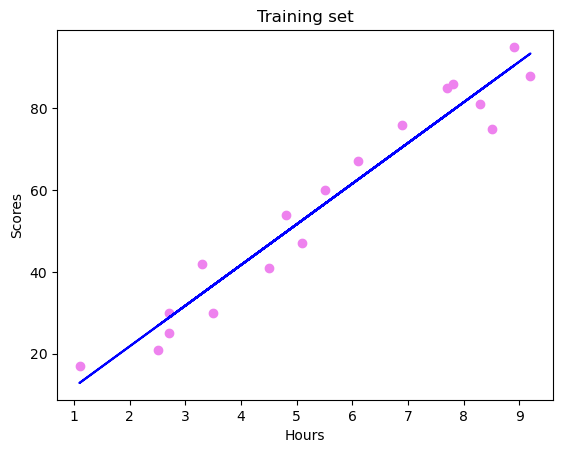

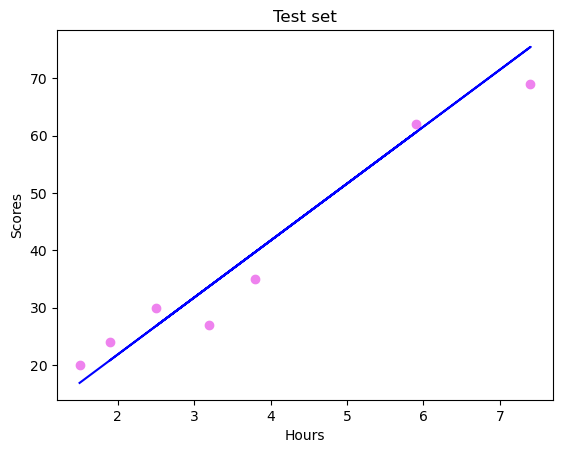

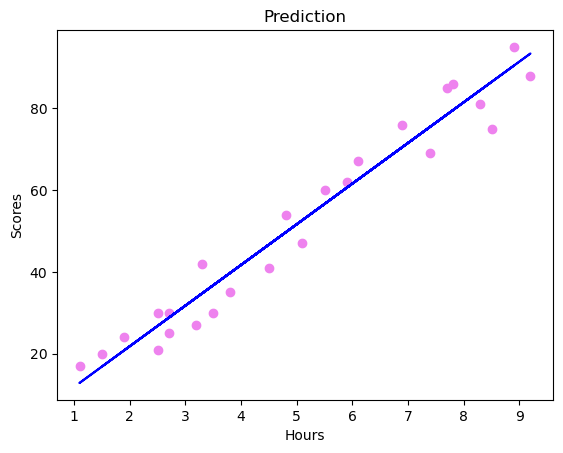

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

ds = pd.read_csv('score.csv')

#1st column
X = ds.iloc[:, :-1].values
#2nd column
y = ds.iloc[:, -1].values

#print(X)
#print(y)

#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

#predictions
y_pred = lr.predict([[1.5],[3.2],[7.4]])

plt.scatter(X_train, y_train, color='violet')
plt.plot(X_train, lr.predict(X_train), ls ='-', color='blue')
plt.title('Training set')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

plt.scatter(X_test, y_test, color='violet')
plt.plot(X_test, lr.predict(X_test), ls ='-', color='blue')
plt.title('Test set')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


plt.scatter(X, y, color='violet')
plt.plot(X, lr.predict(X), ls ='-', color='blue')
plt.title('Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

ridge = Ridge(alpha=0.7).fit(X_train, y_train)

print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

lasso = Lasso(alpha=1.0).fit(X_train, y_train)

print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)

print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.95
Ridge Regression-Test set score: 0.94
Lasso Regression-Training set score: 0.95
Lasso Regression-Test set score: 0.94
Elastic Net-Training set score: 0.95
Elastic Net-Test set score: 0.94
